In [2]:
import glob
import os
import cv2
import glob
import importlib
import h5py
import json
import copy
import _pickle as pkl
import numpy as np
import pandas as pd
import seaborn as sns
import pylab as pl
import matplotlib as mpl
import scipy.stats as spstats

In [3]:
import analyze2p.utils as hutils
import analyze2p.plotting as pplot

import analyze2p.receptive_fields.utils as rfutils
import analyze2p.aggregate_datasets as aggr
import analyze2p.extraction.rois as roiutils
import analyze2p.retinotopy.utils as retutils
import analyze2p.retinotopy.segment as seg
import analyze2p.scatter as sct

/n/coxfs01/2p-pipeline/envs/rat2p/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.10, the latest is 0.4.0.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


In [4]:
rootdir = '/n/coxfs01/2p-data'
aggregate_dir = '/n/coxfs01/julianarhee/aggregate-visual-areas'
pplot.set_plot_params()
scatter_kws={'s':2}

In [145]:
# Metadata
visual_areas=['V1', 'Lm', 'Li']
traceid='traces001'
sdata, cells0 = aggr.get_aggregate_info(visual_areas=visual_areas, return_cells=True)
meta = sdata[sdata.experiment.isin(['rfs', 'rfs10'])].copy()

/n/coxfs01/julianarhee/aggregate-visual-areas/dataset_info_assigned.pkl
Segmentation: missing 12 dsets


## Select dataset and create output dirs

In [146]:
# dk = '20191111_JC117_fov1
# dk ='20190617_JC097_fov1'
# dk = '20191006_JC110_fov1'
# dk = '20190522_JC084_fov1'

In [148]:
# RF settings
# is_neuropil=True
fit_thr=0.5
# experiment='rfs'

In [149]:
response_type='dff'
do_spherical_correction=False
rfdf = rfutils.aggregate_fits(cells0, meta, combine='single', 
                              response_type=response_type,
                              do_spherical_correction=do_spherical_correction,
                              reliable_only=True,
                              pass_criterion='position')

N dpaths: 62, N unfit: 0
N datasets included: 67, N sessions excluded: 4


In [151]:
count_rfs = aggr.count_n_cells(rfdf)
count_rfs

,visual_area,datakey,n_cells
0,Li,20190522_JC089_fov1,3
1,Li,20190527_JC092_fov3,38
2,Li,20190528_JC092_fov1,9
3,Li,20190602_JC091_fov1,65
4,Li,20190606_JC091_fov1,32
5,Li,20190607_JC091_fov1,54
6,Li,20190609_JC099_fov1,35
7,Li,20190612_JC099_fov1,37
8,Li,20190614_JC091_fov1,69
9,Li,20190617_JC099_fov1,12


# Load gradient results

In [167]:
dk='20190617_JC097_fov1'
va='V1'
retinorun, AZMAP_NP, ELMAP_NP, GVECTORS = sct.load_vectors_and_maps(dk, va, 
                                                            create_new=True)

... calculating global gradients (20190617_JC097_fov1, V1)


#### Check gradients

<IPython.core.display.Javascript object>


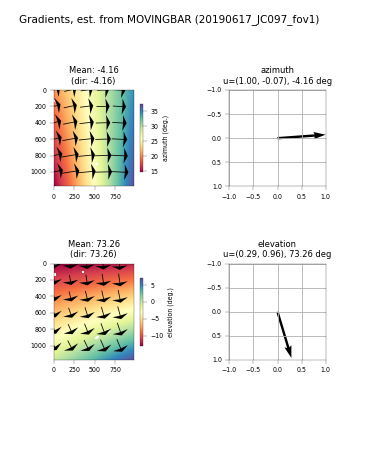

Text(0.05, 0.95, 'Gradients, est. from MOVINGBAR (20190617_JC097_fov1)')

In [168]:
%matplotlib notebook
fig = sct.plot_gradients(dk, va, retinorun, cmap='Spectral')
fig.text(0.05, 0.95, 'Gradients, est. from MOVINGBAR (%s)' % dk)

#### Load Neuropil data points

MEASURED:
|    |       R2 |    RMSE |    pearson_p |   pearson_r |   coefficient |   intercept | cond   |
|---:|---------:|--------:|-------------:|------------:|--------------:|------------:|:-------|
|  0 | 0.91768  | 1.52334 | 5.28461e-238 |    0.957956 |     0.0206098 |     16.5794 | az     |
|  1 | 0.848176 | 1.74746 | 3.62803e-180 |    0.920965 |     0.0148858 |    -13.9465 | el     |
ALIGNED:
|    |       R2 |    RMSE |    pearson_p |   pearson_r |   coefficient |   intercept | cond   |
|---:|---------:|--------:|-------------:|------------:|--------------:|------------:|:-------|
|  0 | 0.924883 | 1.45517 | 1.18219e-246 |    0.961708 |     0.0205776 |     17.6658 | az     |
|  1 | 0.924797 | 1.22986 | 1.51367e-246 |    0.961664 |     0.0162176 |    -16.6105 | el     |


<IPython.core.display.Javascript object>


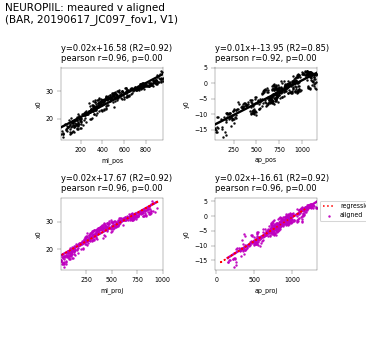

In [169]:
%matplotlib notebook

mag_thr=0.001
delay_map_thr=1.0
ds_factor=2
# # 1. Load neuropil background prefs
# retinodf_np = sct.load_neuropil_data(dk, retinorun, mag_thr=mag_thr, 
#                                 delay_map_thr=delay_map_thr, ds_factor=ds_factor)
# # 2. Align FOV to gradient vector direction 
# curr_np = retinodf_np[retinodf_np.visual_area==va].copy()
# aligned_, M = sct.project_onto_gradient(curr_np, GVECTORS,
#                                   xlabel='ml_pos', ylabel='ap_pos')
# aligned_np = pd.concat([retinodf_np, aligned_], axis=1).dropna()

# # 3. Use NEUROPIL to estimate linear model
# REGR_NP = sct.regress_cortex_and_retino_pos(aligned_np, xvar='proj', model='ridge')
# regr_np_meas = sct.regress_cortex_and_retino_pos(aligned_np, xvar='pos', model='ridge')
aligned_np, REGR_NP, regr_np_meas = sct.transform_and_fit_neuropil(dk, va, retinorun,
                                                    GVECTORS, mag_thr=mag_thr, 
                                                    delay_map_thr=delay_map_thr, 
                                                    ds_factor=ds_factor)
# Save
# sct.update_models(dk, va, REGR_NP)

# Q:  why is reversal (LM) wonky
# Q:  fit SOMA to eitehr BAR or TILE gradient
print("MEASURED:")
print(regr_np_meas.to_markdown())
print("ALIGNED:")
print(REGR_NP.to_markdown())

%matplotlib notebook
fig = sct.plot_measured_and_aligned(aligned_np, REGR_NP, regr_np_meas)
fig.text(0.01, 0.95, 'NEUROPIIL: meaured v aligned\n(BAR, %s, %s)' % (dk, va))

pl.subplots_adjust(bottom=0.4, right=0.65)

#### Load soma

MEASURED:
|    |       R2 |    RMSE |   pearson_p |   pearson_r |   coefficient |   intercept | cond   |
|---:|---------:|--------:|------------:|------------:|--------------:|------------:|:-------|
|  0 | 0.647606 | 3.82333 | 2.08172e-21 |    0.804739 |     0.0230081 |     13.8583 | az     |
|  1 | 0.459531 | 3.0912  | 2.94944e-13 |    0.677887 |     0.0115506 |    -10.4449 | el     |
ALIGNED:
|    |       R2 |    RMSE |   pearson_p |   pearson_r |   coefficient |   intercept | cond   |
|---:|---------:|--------:|------------:|------------:|--------------:|------------:|:-------|
|  0 | 0.645992 | 3.83208 | 2.54242e-21 |    0.803736 |     0.0226371 |     15.4096 | az     |
|  1 | 0.461297 | 3.08614 | 2.55339e-13 |    0.679188 |     0.0124916 |    -12.3986 | el     |


<IPython.core.display.Javascript object>


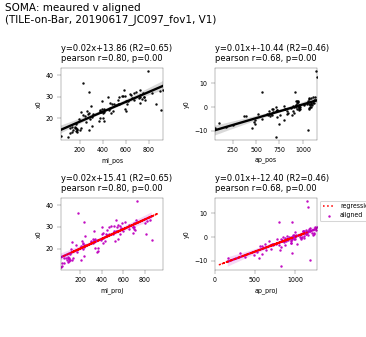

In [171]:
#### Align soma coords to gradient
aligned_soma = sct.predict_soma_from_gradient(dk, va, REGR_NP, experiment='rfs',
                                   response_type=response_type, 
                                   do_spherical_correction=do_spherical_correction)
#### (alrady done above, but get regr. values)
regr_soma_meas = sct.regress_cortex_and_retino_pos(aligned_soma, 
                                                   xvar='pos', model='ridge')
regr_soma_proj = sct.regress_cortex_and_retino_pos(aligned_soma, 
                                                    xvar='proj', model='ridge')
print("MEASURED:")
print(regr_soma_meas.to_markdown())
print("ALIGNED:")
print(regr_soma_proj.to_markdown())
# plot
fig = sct.plot_measured_and_aligned(aligned_soma, regr_soma_proj, regr_soma_meas)
fig.text(0.01, 0.95, 'SOMA: meaured v aligned\n(TILE-on-Bar, %s, %s)' % (dk, va))

pl.subplots_adjust(bottom=0.4, right=0.65)
# figname = 'compared_measured_vs_aligned_CTX_to_RETINO'
# pl.savefig(os.path.join(curr_dst_dir, '%s.svg' % figname))

# Plot

In [172]:
# output dir
rf_str = 'sphr_corrected' if do_spherical_correction else ''
dst_dir = os.path.join(aggregate_dir, 'receptive-fields', 'scatter/%s' % rf_str)
print(dst_dir)
if not os.path.exists(dst_dir):
    os.makedirs(dst_dir)
    
FIGDIR = os.path.join(aggregate_dir, 'FIGURES', 'retinotopy', 'scatter/%s' % rf_str)
if not os.path.exists(FIGDIR):
    os.makedirs(FIGDIR)

print(FIGDIR)

/n/coxfs01/julianarhee/aggregate-visual-areas/receptive-fields/scatter/
/n/coxfs01/julianarhee/aggregate-visual-areas/FIGURES/retinotopy/scatter/


## predicted_vs_measured_fov_overlay

In [173]:
zimg, masks, ctrs = roiutils.get_masks_and_centroids(dk, traceid=traceid)
pixel_size = hutils.get_pixel_size()
zimg_r = retutils.transform_2p_fov(zimg, pixel_size)

In [174]:
inbounds_soma = aligned_soma[aligned_soma.inbounds].copy()

In [175]:
# Make sure we are in bounds of FOV
ap_lim, ml_lim = AZMAP_NP.shape
print(ap_lim, ml_lim)
incl_plotdf = inbounds_soma[(inbounds_soma['predicted_ml_pos']>=0) 
                            & (inbounds_soma['predicted_ml_pos']<=ml_lim) 
                            & (inbounds_soma['predicted_ap_pos']>=0)
                            & (inbounds_soma['predicted_ap_pos']<=ap_lim)].copy()
excl_ixs = [i for i in inbounds_soma.index.tolist() if i not in incl_plotdf.index]
plotdf = incl_plotdf.iloc[0::].copy()

vmin = min([np.nanmin(AZMAP_NP), plotdf['x0'].min()])
vmax = max([np.nanmax(AZMAP_NP), plotdf['x0'].max()])
print("AZ: min/max = %.2f, %.2f" % (vmin, vmax))
vmin = min([np.nanmin(ELMAP_NP), plotdf['y0'].min()])
vmax = max([np.nanmax(ELMAP_NP), plotdf['y0'].max()])
print("EL: min/max = %.2f, %.2f" % (vmin, vmax))


1177 972
AZ: min/max = 14.76, 37.33
EL: min/max = -12.99, 7.14


In [176]:
vmin = min([np.nanmin(AZMAP_NP), plotdf['x0'].min()])
vmax = max([np.nanmax(AZMAP_NP), plotdf['x0'].max()])
az_min=np.floor(vmin)
az_max=np.ceil(vmax)
vmin = min([np.nanmin(ELMAP_NP), plotdf['y0'].min()])
vmax = max([np.nanmax(ELMAP_NP), plotdf['y0'].max()])
el_min=np.floor(vmin)
el_max=np.ceil(vmax)

# az_min=5
# az_max=30
# el_min=-30
# el_max=-5

<IPython.core.display.Javascript object>


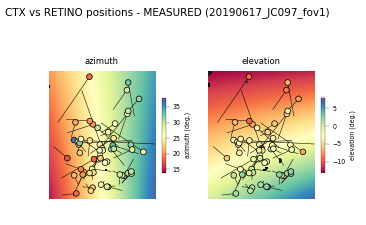

Text(0.01, 0.95, 'CTX vs RETINO positions - MEASURED (20190617_JC097_fov1)')

In [177]:
roi_interval = 1
cmap='Spectral'
plot_true=True
plot_predicted=False
plot_lines=True

color_true='k'
color_predicted='w'

markersize=30
lw=0.7
alpha=1

fig, axn = pl.subplots(1, 2, figsize=(6.5,4))
for ax, cond in zip(axn, ['azimuth', 'elevation']):
    neuropil_map = AZMAP_NP.copy() if cond=='azimuth' else ELMAP_NP.copy()
    retino_label='x0' if cond=='azimuth' else 'y0'
    # Set color limits
    vmin = az_min if cond=='azimuth' else el_min #min([np.nanmin(neuropil_map), plotdf[retino_label].min()])
    vmax = az_max if cond=='azimuth' else el_max #max([np.nanmax(neuropil_map), plotdf[retino_label].max()])
    normalize = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
    ax.set_title(cond)
    sm = pl.cm.ScalarMappable(cmap=cmap, norm=normalize)
    sm.set_array([])
    
    ax.imshow(zimg_r, cmap='gray') #, vmin=abs_vmin, vmax=abs_vmax)
    ax.imshow(neuropil_map, cmap=cmap, vmin=vmin, vmax=vmax, alpha=alpha)
    ax.figure.colorbar(sm, ax=ax, shrink=0.5, label='%s (deg.)' % cond)
    
    if plot_predicted:
        # Plot soma
        sns.scatterplot(x='predicted_ml_pos', y='predicted_ap_pos', 
                data=plotdf, ax=ax,
                alpha=alpha, hue=retino_label, hue_norm=normalize, palette=cmap,
                s=markersize, linewidth=lw, edgecolor=color_predicted, zorder=1000) 
    if plot_lines:
        # Plot connecting line
        for (x1, y1), (x2, y2) in zip(\
                plotdf[['predicted_ml_pos', 'predicted_ap_pos']].values,
                plotdf[['ml_pos', 'ap_pos']].values):
            ax.plot([x1, x2], [y1, y2], lw=0.5, markersize=0, color='k')
    if plot_true:
        # Plot soma
        sns.scatterplot(x='ml_pos', y='ap_pos', data=plotdf, ax=ax,
                alpha=alpha, hue=retino_label, hue_norm=normalize, palette=cmap,
                s=markersize, linewidth=lw, edgecolor=color_true, zorder=1000) 
for ax in axn:
    ax.legend_.remove()
    ax.axis('off')
pl.subplots_adjust(left=0.1, right=0.7, bottom=0.3, top=0.8)
fig.text(0.01, 0.95, 'CTX vs RETINO positions - MEASURED (%s)' % dk)

# figname = 'scatter_example_%s' % dk
# pl.savefig(os.path.join(dst_dir, '%s.svg' % figname))
# pl.savefig(os.path.join(FIGDIR, '%s.svg' % figname))

# Calculate scatter

In [178]:
# Load scatter analysis for current FOV
scatter0 = sct.load_scatter_results(dk, va, experiment, verbose=False)
# Get cells with reliable fits
fit_desc = rfutils.get_fit_desc(response_type=response_type, 
                                do_spherical_correction=do_spherical_correction)
eval_results, eval_params = rfutils.load_eval_results(dk, experiment=experiment, 
                                traceid=traceid, fit_desc=fit_desc)   
reliable_ = rfutils.get_reliable_fits(eval_results['pass_cis'],
                                pass_criterion='position')
# Assign reliable index
found_rois = scatter0['cell'].unique()
scatter0['reliable'] = False
scatter0.loc[scatter0['cell'].isin(reliable_), 'reliable'] = True

In [179]:
# Identify "true deviants"
devs_ = sct.get_deviants_in_fov(dk, va, experiment=experiment, redo_fov=False,
                     traceid=traceid, response_type=response_type, 
                     do_spherical_correction=do_spherical_correction)               
devs_ = devs_.rename(columns={'deviants': 'cell'})
devs_['deviant'] = True
# merge
scatter_ = scatter0.merge(devs_, on=['cell', 'axis'], how='outer')
scatter_ = scatter_.fillna(value=False).sort_values(by=['cell', 'axis'])\
                   .reset_index(drop=True)

In [180]:
# Only get reliable
rois_ = np.intersect1d(reliable_, aligned_soma[aligned_soma.inbounds]['cell'].unique())
boot_ = eval_results['bootdf'][eval_results['bootdf']['cell'].isin(rois_)]
cis_ = eval_results['cis'].loc[rois_]
fitrfs_ = aligned_soma[aligned_soma['cell'].isin(rois_)].copy()
fitrfs_.index = fitrfs_['cell'].values

<IPython.core.display.Javascript object>


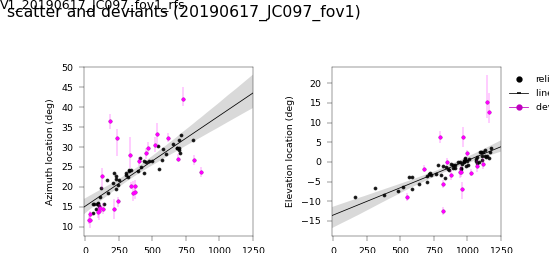

In [183]:
%matplotlib notebook
ci = 0.95
fill_marker=True
deviant_color='magenta'

fig, axn = pl.subplots(1, 2, figsize=(6.5,3), dpi=150, sharex=True)
for ax, cond in zip(axn.flat, ['az', 'el']):
    # Get var names for V1/V2
#     if cond=='az':
#         ax.set_ylim([0, 60])
#     else:
#         #pass
#         ax.set_ylim([-60, -0])
    xname = 'ml_proj' if cond=='az' else 'ap_proj'
    yname = 'x0' if cond=='az' else 'y0'
    ax.set_xlim([-10, 1250])
    # Get projected cortical position
    ax, devs_ = sct.fit_with_deviants(boot_, cis_, fitrfs_, 
                          xname=xname, yname=yname, ax=ax,
                          scatter_kws={'s': 2, 'marker': 'o'}, line_kws={'lw': 0.5}, 
                          deviant_color=deviant_color)
    ylabel='Azimuth' if cond=='az' else 'Elevation'
    ax.set_ylabel('%s location (deg)' % ylabel)
    ax.set_xlabel('Cortical position (um)')
    devdf = pd.DataFrame({'deviants': devs_})
    devdf['cond'] = cond
    ax.set_box_aspect(1)
pl.subplots_adjust(left=0.1, right=0.75, bottom=0.25, top=0.85, wspace=0.3)

leg_h = pplot.custom_legend_markers(colors=['k', 'k', 'm'],
                    labels=['reliable', 'linear fit (95% CI)', 'deviant (95% CI)'],
                    markers=['o', '_', 'o'], lws=[0, 0.5, 0.5])
ax.legend(handles=leg_h, bbox_to_anchor=(1,1), loc='upper left',
          frameon=False, fontsize=6, markerscale=0.5)

pl.subplots_adjust(left=0.1, right=0.7, bottom=0.3, top=0.8)

fig.text(0.01, 0.95, 'scatter and deviants (%s)' % dk)
pplot.label_figure(fig, '%s_%s_%s' % (va, dk, experiment))

# figname = 'deviants_example_%s' % dk
# pl.savefig(os.path.join(dst_dir, '%s.svg' % figname))
# pl.savefig(os.path.join(FIGDIR, '%s.svg' % figname))


In [184]:
fitrfs_[(fitrfs_.x0>20) & (fitrfs_.ml_proj<600)]

,x0,y0,sigma_x,sigma_y,theta,offset,amplitude,r2,cell,visual_area,...,predicted_ap_proj,predicted_x0,predicted_y0,predicted_ml_pos,predicted_ap_pos,deg_scatter_x0,deg_scatter_y0,dist_scatter_ml,dist_scatter_ap,inbounds
37,29.787194,3.523769,27.457337,20.310999,6.274474,-0.003209,0.064675,0.573428,37,V1,...,1241.508355,27.215205,2.422856,670.242139,1094.860384,2.571988,1.100913,124.989655,67.884013,True
39,28.468079,2.576100,26.823645,21.658984,0.020461,-0.002368,0.063541,0.623277,39,V1,...,1183.073650,26.984221,2.333713,603.001314,1054.063627,1.483859,0.242388,72.110344,14.946014,True
43,26.539960,1.448276,23.598690,17.478454,0.202113,-0.002607,0.072106,0.665056,43,V1,...,1113.530256,25.917758,1.798412,505.896398,1010.648708,0.622202,-0.350136,30.236851,21.589931,True
48,22.406671,1.312235,22.681331,16.032212,6.241123,-0.001610,0.047623,0.551778,48,V1,...,1105.141750,24.274578,1.863306,308.190097,1061.352292,-1.867907,-0.551071,90.773767,33.979876,True
54,23.076621,1.056457,26.956937,16.308398,0.136952,-0.000272,0.068667,0.661150,54,V1,...,1089.370083,23.920734,2.221644,338.962356,1035.627470,-0.844113,-1.165186,41.020943,71.847215,True
61,22.847355,12.767858,24.683633,11.387274,5.363801,0.000603,0.251953,0.704631,61,V1,...,1811.513384,20.208036,2.217827,381.701951,1776.871694,2.639319,10.550032,128.261702,650.531464,True
87,21.684254,0.935927,21.591414,13.607556,0.141863,-0.005726,0.222441,0.555521,87,V1,...,1081.937967,21.004902,-0.672905,272.019356,1048.000641,0.679351,1.608832,33.014103,99.203076,True
91,21.823276,0.709326,23.488023,12.838041,0.041407,-0.001975,0.104760,0.735263,91,V1,...,1067.965436,22.807805,-0.738019,277.609747,1031.728413,-0.984529,1.447345,47.844651,89.245590,True
92,20.539933,2.177044,21.807394,17.133803,6.201981,-0.003690,0.103592,0.808495,92,V1,...,1158.467200,22.617124,-0.415692,223.143858,1142.616442,-2.077191,2.592736,100.944219,159.872135,True
133,36.496285,-1.688454,17.974285,8.875770,0.297407,0.000043,0.102357,0.585708,133,V1,...,920.114546,21.447410,-5.692348,966.257258,670.213374,15.048876,4.003894,731.322832,246.886397,True


In [47]:
importlib.reload(sct)

<module 'analyze2p.scatter' from '/net/coxfs01/srv/export/coxfs01/share_root/2p-pipeline/repos/rat-2p-area-characterizations/analyze2p/scatter.py'>

<IPython.core.display.Javascript object>


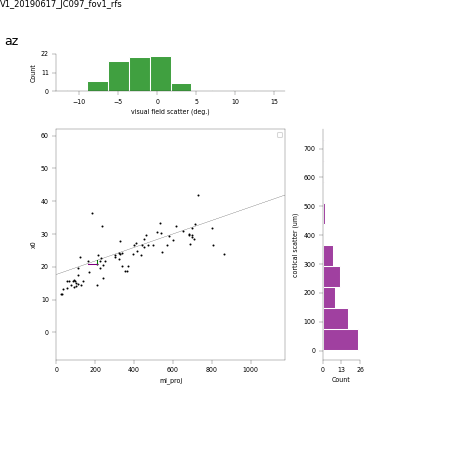

No handles with labels found to put in legend.


<IPython.core.display.Javascript object>


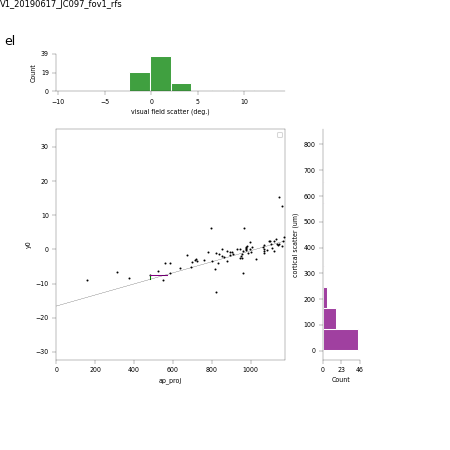

No handles with labels found to put in legend.


In [185]:
sz = 3
lw=0.5
nbins=10
color1='purple'
color2='green'

for cond in ['az', 'el']:
    dist_lim = ml_lim if cond=='az' else ap_lim
    fig = sct.plot_scatter_and_marginals(fitrfs_, REGR_NP, roi_to_label=None, #93,
                                         cond=cond,
                                        xlim=ap_lim, ylim=None, lw=1)
    pplot.label_figure(fig, '%s_%s_%s' % (va, dk, experiment))
    fig.text(0.01, 0.9, '%s' % cond, fontsize=12)
    pl.subplots_adjust(bottom=0.2, right=0.8)
    figname = 'scatter_marginals_%s_%s' % (cond, dk)
    #pl.savefig(os.path.join(dst_dir, '%s.svg' % figname))
    #pl.savefig(os.path.join(FIGDIR, '%s.svg' % figname))


In [143]:
fitrfs_[fitrfs_['cell']==78]

,x0,y0,sigma_x,sigma_y,theta,offset,amplitude,r2,cell,visual_area,...,predicted_ap_proj,predicted_x0,predicted_y0,predicted_ml_pos,predicted_ap_pos,deg_scatter_x0,deg_scatter_y0,dist_scatter_ml,dist_scatter_ap,inbounds


In [303]:
int(np.where(fitrfs_['cell']==78)[0])



37